<div style="text-align: center;">
    <h1 style="
        background: linear-gradient(135deg, #e37e59ff, #bd765cff); 
        color: white; 
        padding: 15px 30px; 
        border-radius: 500px; 
        font-family: 'Segoe UI', Arial, sans-serif; 
        box-shadow: 0 4px 15px rgba(0,0,0,0.3);
        display: inline-block;
    ">
       Machine Learning Day 2 - Session 2
    </h1>
</div>


 <h1 style="color:#FFFEFE">Question 1</h1>

<h3 style="color:#e37e59f0">1. Import The Required Libraries</h3>

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from IPython.display import display, HTML
from sklearn.svm import SVC

<h3 style="color:#e37e59f0">2. Loading Breast Cancer Dataset using Pandas</h3>

In [39]:
breastcancer = pd.read_csv(r"C:\Users\Rammah\OneDrive\Desktop\اجازه ان شاء الله\ML\Day9\data\breast-cancer.csv")

<h3 style="color:#e37e59f0">3. Displaying the First Five Rows of the Breast Cancer Dataset</h3>

In [40]:
breastcancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<h3 style="color:#e37e59f0">4. Encoding Malignant Diagnosis as 1 in the Dataset</h3>

In [41]:
breastcancer['diagnosis'] = breastcancer.diagnosis.replace('M', 1)

<h3 style="color:#e37e59f0">5. Encoding Benign Diagnosis as 0 in the Dataset</h3>

In [42]:
breastcancer['diagnosis'] = breastcancer.diagnosis.replace('B', 0)

C:\Users\Rammah\AppData\Local\Temp\ipykernel_22192\3788813050.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  breastcancer['diagnosis'] = breastcancer.diagnosis.replace('B', 0)


<h3 style="color:#e37e59f0">6. Converting Diagnosis Column to Integer Type</h3>

In [43]:
breastcancer.diagnosis = breastcancer.diagnosis.astype('int')

<h3 style="color:#e37e59f0">7. Getting Information About the Breast Cancer Dataset After Edit</h3>

In [44]:
breastcancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

<h3 style="color:#e37e59f0">8. Counting the Frequency of Each Diagnosis Value</h3>

In [45]:
breastcancer.diagnosis.value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

<h3 style="color:#e37e59f0">9. Plotting the Distribution of Diagnosis Classes</h3>

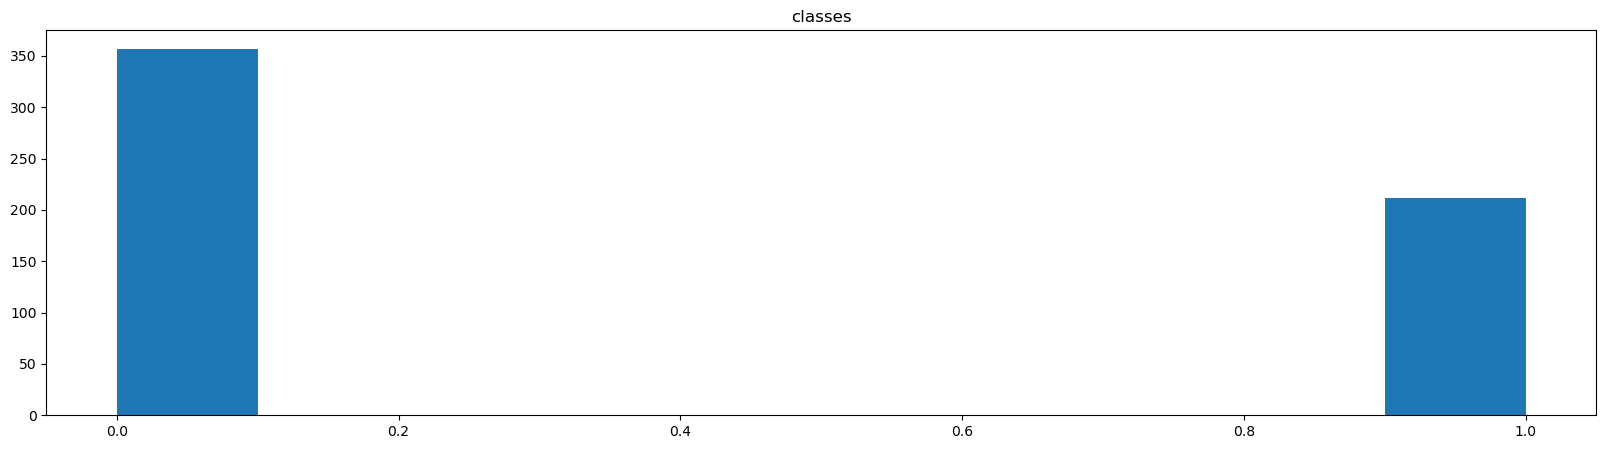

In [46]:
plt.figure(figsize=(20, 5))
plt.hist(breastcancer["diagnosis"])
plt.title("classes")
plt.show()

<h3 style="color:#e37e59f0">10. Separating Features (X) and Target (y)</h3>

In [47]:
X = breastcancer.drop('diagnosis', axis = 1)
y = breastcancer['diagnosis']

<h3 style="color:#e37e59f0">11. Splitting Dataset into Training and Testing Sets</h3>

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

<h3 style="color:#e37e59f0">12. Initializing a Decision Tree Classifier</h3>

In [49]:
dt = DecisionTreeClassifier()

<h3 style="color:#e37e59f0">13. Training the Decision Tree Classifier on the Training Data</h3>

In [50]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

<h3 style="color:#e37e59f0">14. Making Predictions on the Test Set</h3>

In [51]:
y_pred = dt.predict(X_test)

<h3 style="color:#e37e59f0">15. Evaluating the Model Accuracy on the Test Set</h3>

In [52]:
dt.score(X_test, y_test)

0.9210526315789473

<h3 style="color:#e37e59f0">16. Displaying Confusion Matrix and Classification Report with Styled Tables</h3>

In [53]:
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred, output_dict=True)
cm_df = pd.DataFrame(cm, index=["Actual False", "Actual True"], columns=["Pred False", "Pred True"])
cr_df = pd.DataFrame(cr).transpose().round(3)
html = f"""
<div style="display:flex; gap:24px;">
  <div style="border:2px solid #e37e59f0; padding:10px; border-radius:8px;">
    <h3 style="color:#e37e59f0; text-align:center;">Confusion Matrix</h3>
    {cm_df.to_html()}
  </div>
  <div style="border:2px solid #e37e59f0; padding:10px; border-radius:8px;">
    <h3 style="color:#e37e59f0; text-align:center;">Classification Report</h3>
    {cr_df.to_html()}
  </div>
</div>
"""
display(HTML(html))

<h3 style="color:#e37e59f0">17. Visualizing Confusion Matrix and Classification Report using Heatmaps</h3>

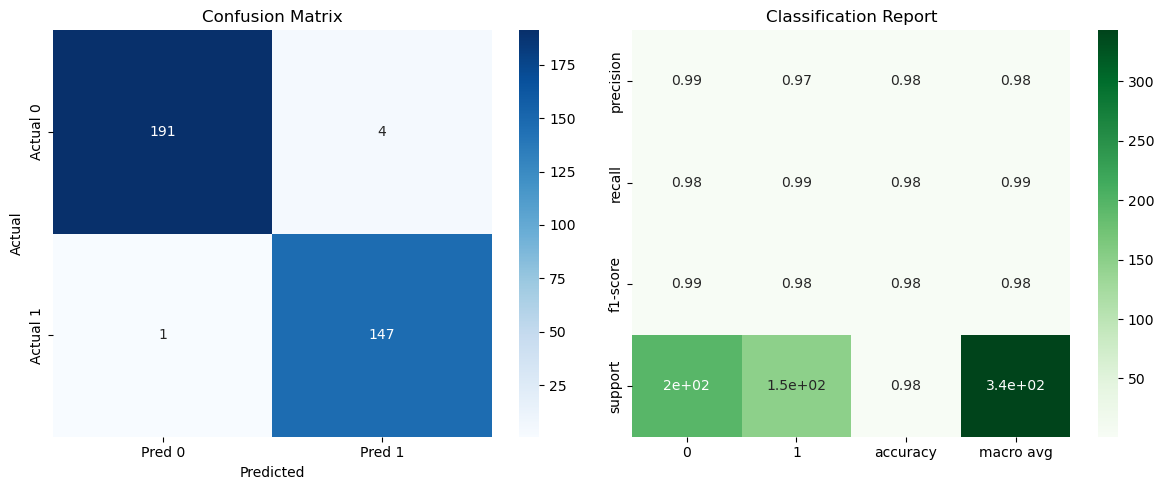

In [66]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Pred 0","Pred 1"], yticklabels=["Actual 0","Actual 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.subplot(1,2,2)
sns.heatmap(cr_df.iloc[:-1, :].T, annot=True, cmap="Greens")
plt.title("Classification Report")
plt.tight_layout()
plt.show()

 <h1 style="color:#FFFEFE">Question 2</h1>

<h3 style="color:#e37e59f0">1. Loading and Displaying the First Rows of the Banknote Authentication Dataset</h3>

In [55]:
bankdata = pd.read_csv(R"C:\Users\Rammah\OneDrive\Desktop\اجازه ان شاء الله\ML\Day9\data\bill_authentication.csv")
bankdata.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


<h3 style="color:#e37e59f0">2. Displaying Dataset Information and Data Types</h3>

In [56]:
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


<h3 style="color:#e37e59f0">3. Separating Features (X) and Target (y) in the Banknote Datase</h3>

In [57]:
X = bankdata.drop('Class', axis = 1)
y = bankdata['Class']

<h3 style="color:#e37e59f0">4. Splitting the Banknote Dataset into Training and Testing Sets</h3>

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 43)

<h3 style="color:#e37e59f0">5. Training a Support Vector Classifier with Linear Kernel</h3>

In [59]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

<h3 style="color:#e37e59f0">6. Making Predictions with the Support Vector Classifier</h3>

In [60]:
y_pred = svclassifier.predict(X_test)

<h3 style="color:#e37e59f0">7. Displaying Confusion Matrix and Classification Report with Styled Tables</h3>

In [61]:
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred, output_dict=True)

cm_df = pd.DataFrame(cm, index=["Actual False", "Actual True"], columns=["Pred False", "Pred True"])
cr_df = pd.DataFrame(cr).transpose().round(3)

html = f"""
<div style="display:flex; gap:24px;">
  <div style="border:2px solid #e37e59f0; padding:10px; border-radius:8px;">
    <h3 style="color:#e37e59f0; text-align:center;">Confusion Matrix</h3>
    {cm_df.to_html()}
  </div>
  <div style="border:2px solid #e37e59f0; padding:10px; border-radius:8px;">
    <h3 style="color:#e37e59f0; text-align:center;">Classification Report</h3>
    {cr_df.to_html()}
  </div>
</div>
"""

display(HTML(html))


<h3 style="color:#e37e59f0">8. Visualizing Confusion Matrix and Classification Report using Heatmaps</h3>

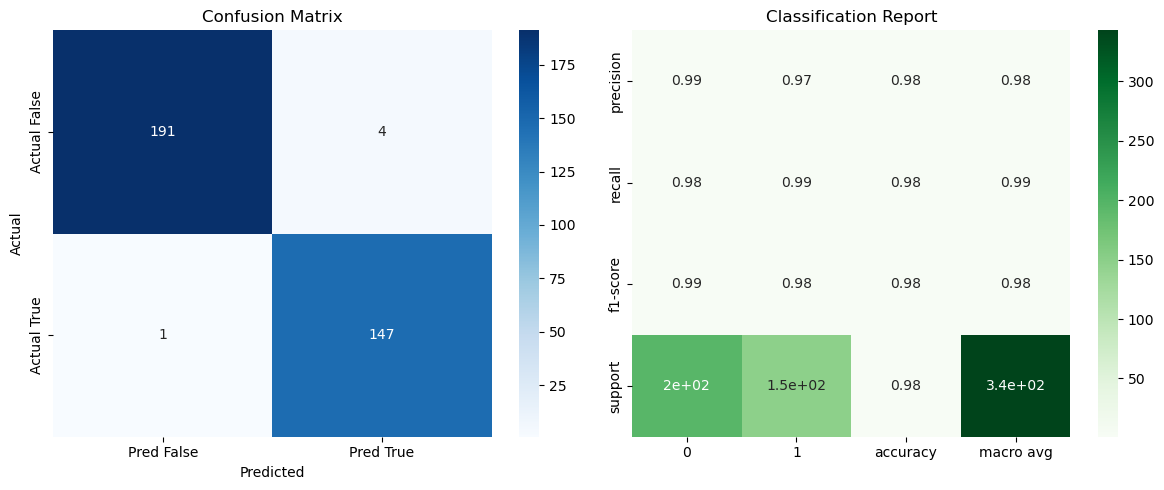

In [62]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Pred False","Pred True"], yticklabels=["Actual False","Actual True"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.subplot(1,2,2)
sns.heatmap(cr_df.iloc[:-1, :].T, annot=True, cmap="Greens")
plt.title("Classification Report")
plt.tight_layout()
plt.show()

<h3 style="color:#e37e59f0">9. Initializing GridSearchCV for SVM Hyperparameter Tuning</h3>

In [63]:
param_dist = {'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [0.01, 0.1, 0.5, 1, 3, 7]}
svm_gs = GridSearchCV(svclassifier, param_dist, cv=5)

<h3 style="color:#e37e59f0">10. Fitting GridSearchCV on the Entire Dataset</h3>

In [64]:
svm_gs.fit(X, y)

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': [0.01, 0.1, 0.5, 1, 3, 7],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

<h3 style="color:#e37e59f0">11. Displaying the Best SVM Parameters and Corresponding Score</h3>

In [65]:
html = f"""
<div style="display:flex; gap:24px;">
  <div style="border:2px solid #e37e59f0; padding:10px; border-radius:8px;">
    <h3 style="color:#e37e59f0; text-align:center;">Tuned SVM Parameters</h3>
    {svm_gs.best_params_}
  </div>
  <div style="border:2px solid #e37e59f0; padding:10px; border-radius:8px;">
    <h3 style="color:#e37e59f0; text-align:center;">Best score is</h3>
    {svm_gs.best_score_}
  </div>
</div>
"""

display(HTML(html))